**Import Libraray**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import warnings
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer,MaxPool2D,Conv2D,Dense,Flatten
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Wandb is use for Visulation & graph**

In [ ]:
# !pip install wandb



---



## **Prepard Data**



---



In [ ]:
dataset , dataset_info = tfds.load('malaria',with_info=True,as_supervised=True, shuffle_files=True, split=['train'] )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteZC3Q9S/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset,val_dataset,test_dataset = split(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()))


[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)]


# **Making a Split Function**

In [ ]:
def split(dataset , TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
  val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = dataset.take(int(VAL_RATIO*DATASET_SIZE))
  test_dataset = dataset.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_dataset,val_dataset,test_dataset




---



# **Dataset Visualization**

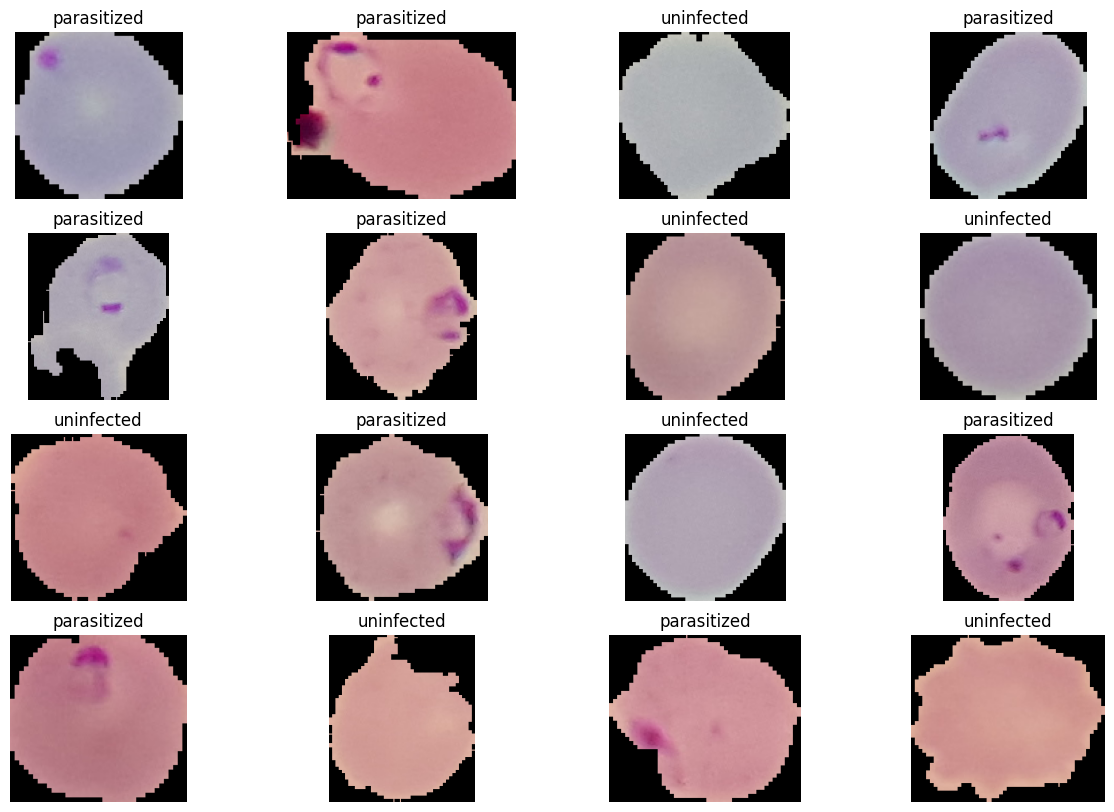

In [ ]:
plt.figure(figsize=(15,10))
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [ ]:
dataset_info.features['label'].int2str(label)

'uninfected'

# **Data Preprocessing**

In [ ]:
IMG_SCALE = 224
def resizing_image(image,label):
  return tf.image.resize(image,(IMG_SCALE,IMG_SCALE))/255.0 , label

In [ ]:
train_dataset = train_dataset.map(resizing_image)

In [ ]:
for image,label in train_dataset.take(1):
  print(image)
  print(label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

# **Model Traning**

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IMG_SCALE,IMG_SCALE,3)),
    Conv2D(filters=6,kernel_size=5,strides=1,padding='valid',activation='sigmoid'),
    MaxPool2D(pool_size = 2,strides=2),

    Conv2D(filters=16,kernel_size=5,strides=1,padding='valid',activation='sigmoid'),
    MaxPool2D(pool_size = 2,strides=2),
    Flatten(),
    Dense(1000,activation='sigmoid'),
    Dense(10,activation='sigmoid'),
    Dense(1,activation='sigmoid'),


])
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 44944)             0         
                                                                 
 dense_15 (Dense)            (None, 1000)             

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),
             loss= tf.keras.losses.BinaryCrossentropy(),)
            #  metrics=RootMeanSquaredError())

In [1]:
model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)